In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')
import os, cv2, re, random, time, zipfile, gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers, models, optimizers
#from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop, Adam
import efficientnet.tfkeras as efn


In [2]:
import natsort
TEST_DIR = '/home/students/acct2013_01/CHY/datasets/test/'

test_images = []
test_images = [TEST_DIR+i for i in natsort.natsorted(os.listdir(TEST_DIR))]

In [3]:
test_images

['/home/students/acct2013_01/CHY/datasets/test/1.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/2.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/3.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/4.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/5.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/6.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/7.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/8.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/9.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/10.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/11.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/12.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/13.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/14.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/15.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/16.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/17.jpg',
 '/home/students/acct2013_01/CHY/datasets/test/18.jpg',
 

In [4]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
    
test = []
for img in test_images:
    test.append(cv2.resize(cv2.imread(img), 
                        (IMG_WIDTH, IMG_HEIGHT), 
                        interpolation=cv2.INTER_CUBIC))
    
print('The shape of test data is {}'.format(np.array(test).shape))


test = np.array(test)

The shape of test data is (500, 128, 128, 3)


In [5]:
import tensorflow as tf
model = models.Sequential()


efnModel = efn.EfficientNetB0(weights = 'imagenet', 
                       input_shape = (IMG_WIDTH, IMG_HEIGHT,3), 
                       include_top = False)
model.add(efnModel)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

2021-11-07 22:39:44.233898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/students/acct2013_01/hy_ee4483/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-07 22:39:44.234315: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-07 22:39:44.234689: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in 

In [6]:
model.load_weights('/home/students/acct2013_01/CHY/dogs_cats_efficientnetb0.h5')
test = test.astype('float32') / 255
test_pred = np.where(model.predict(test)>0.5,1,0)
submission = pd.DataFrame({'id': range(1, len(test_images) + 1), 'label': test_pred.ravel()})
submission.to_csv('submission_b0.csv', index = False)
submission

,id,label
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
...,...,...
495,496,0
496,497,0
497,498,0
498,499,0


In [6]:
datagen = ImageDataGenerator(
            rescale=1. / 255,             # Scale data to 0-1 range
            )          # How to fill in newly created pixels

val_datagen = ImageDataGenerator(rescale=1./255)
val_x = np.array(val_x)
val_y = np.array(val_y)
import tensorflow as tf
with tf.device('/device:GPU:1'):
    BATCH_SIZE = 16
    datagen = datagen.flow(train_x, train_y, batch_size=BATCH_SIZE)
    val_datagen = val_datagen.flow(val_x, val_y, batch_size=BATCH_SIZE)

    earlystop1 = EarlyStopping(patience=5)
    earlystop2 = ReduceLROnPlateau(monitor = 'val_accuracy', min_lr = 0.001, 
                                patience = 5, mode = 'min', 
                                verbose = 1)

    history = model.fit(datagen, 
                        steps_per_epoch=45,
                        epochs=20,
                        validation_data=val_datagen,
                        callbacks=[earlystop1, earlystop2],
                        validation_steps=25)

    model.save('dogs_cats_efficientnetb0_without_augmentation.h5')

Epoch 1/20
45/45 [==============================] - 19s 313ms/step - loss: 0.4980 - accuracy: 0.7764 - val_loss: 0.2725 - val_accuracy: 0.9075 - lr: 1.0000e-04
Epoch 2/20
45/45 [==============================] - 13s 287ms/step - loss: 0.2972 - accuracy: 0.8958 - val_loss: 0.1920 - val_accuracy: 0.9350 - lr: 1.0000e-04
Epoch 3/20
45/45 [==============================] - 13s 289ms/step - loss: 0.2267 - accuracy: 0.9139 - val_loss: 0.1706 - val_accuracy: 0.9350 - lr: 1.0000e-04
Epoch 4/20
45/45 [==============================] - 13s 283ms/step - loss: 0.2274 - accuracy: 0.9083 - val_loss: 0.1394 - val_accuracy: 0.9450 - lr: 1.0000e-04
Epoch 5/20
45/45 [==============================] - 13s 283ms/step - loss: 0.1947 - accuracy: 0.9236 - val_loss: 0.1436 - val_accuracy: 0.9450 - lr: 1.0000e-04
Epoch 6/20
45/45 [==============================] - 13s 282ms/step - loss: 0.1592 - accuracy: 0.9444 - val_loss: 0.1502 - val_accuracy: 0.9400 - lr: 1.0000e-04
Epoch 7/20
45/45 [======================

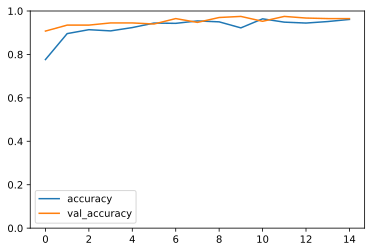

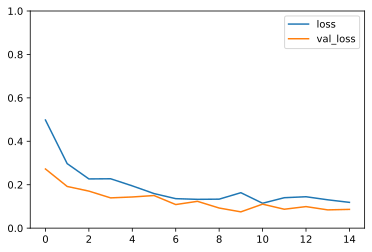

In [7]:
plt.rcParams['figure.facecolor'] = 'white'
model_loss = pd.DataFrame(history.history)
model_loss.head()
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1]);
model_loss[['loss','val_loss']].plot(ylim=[0,1]);